<a href="https://colab.research.google.com/github/Prachi09062003/Deep_learning_pracs/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRACHI MISTRY

---
ROLL NO: L002


---

SAP ID: 40778230002

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb # Fixed typo: rbg2hsv -> rgb2hsv
from scipy.signal import convolve2d

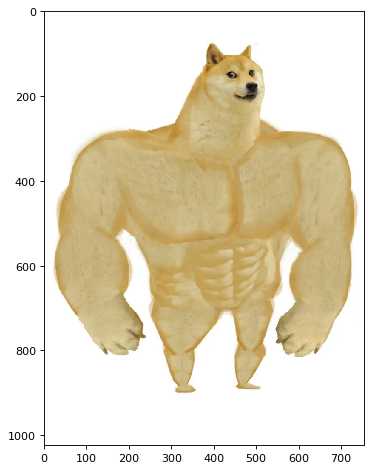

In [ ]:
#Reading image
dog = imread("/content/dog.jpeg")
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(dog)

In [ ]:
#Filter MAtrices
sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])
blur = np.array([[0.11,0.11,0.11],
                    [0.11,0.11,0.11],
                    [0.11,0.11,0.11]])
vertical = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
gaussian = (1/16.0) * np.array([[1,2,1],
                                [2,4,2],
                                [1,2,1]])


Text(0.5, 1.0, 'Vertical')

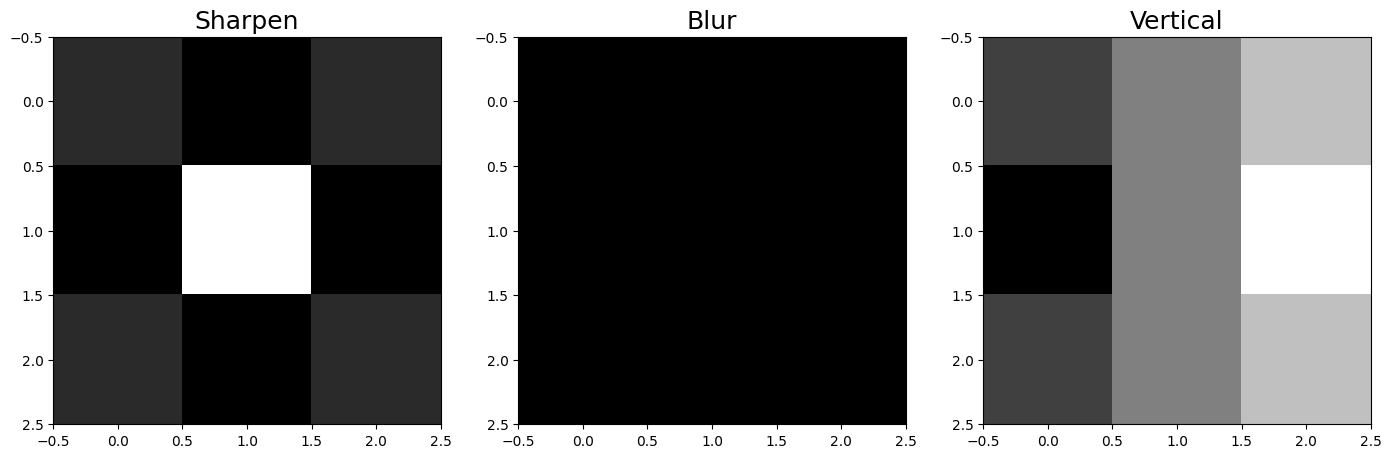

In [ ]:
#plotting the filters

fig,ax = plt.subplots(1,3, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize=18)

ax[1].imshow(blur, cmap='gray')
ax[1].set_title(f'Blur', fontsize=18)

ax[2].imshow(vertical, cmap='gray')
ax[2].set_title(f'Vertical', fontsize=18)

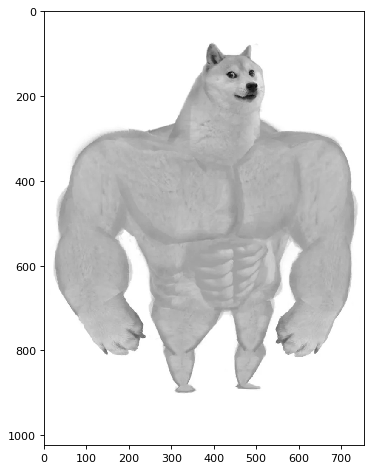

In [ ]:
#Grayscaling Image
dog_gray = rgb2gray(dog)
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(dog_gray)

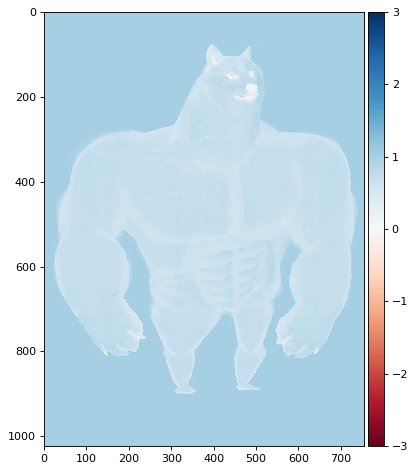

In [ ]:
#Function for applying filters
def multi_convolver(image, kernel, iterations):
  for i in range(iterations):
    image = convolve2d(image, kernel, 'same', boundary = 'fill', fillvalue = 0)
  return image

convolved_image = multi_convolver(dog_gray, sharpen, 1)

plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(convolved_image);

In [ ]:
#For colored Image
def convolver_rgb(image, kernel, iterations = 1):
  convolved_image_r = multi_convolver(image[:,:,0], kernel, iterations)
  convolved_image_g = multi_convolver(image[:,:,1], kernel, iterations)
  convolved_image_b = multi_convolver(image[:,:,2], kernel, iterations)

  reformed_image = np.dstack((np.rint(abs(convolved_image_r)),np.rint(abs(convolved_image_g)),np.rint(abs(convolved_image_b))))/255

  fig,ax = plt.subplots(1,3, figsize = (17,10))

  ax[0].imshow(abs(convolved_image_r), cmap='Reds')
  ax[0].set_title(f'Red', fontsize=15)

  ax[1].imshow(abs(convolved_image_g), cmap='Greens')
  ax[1].set_title(f'Green', fontsize=18)

  ax[2].imshow(abs(convolved_image_b), cmap='Blues')
  ax[2].set_title(f'Blue', fontsize=18)

  return np.array(reformed_image*255).astype(np.uint8)

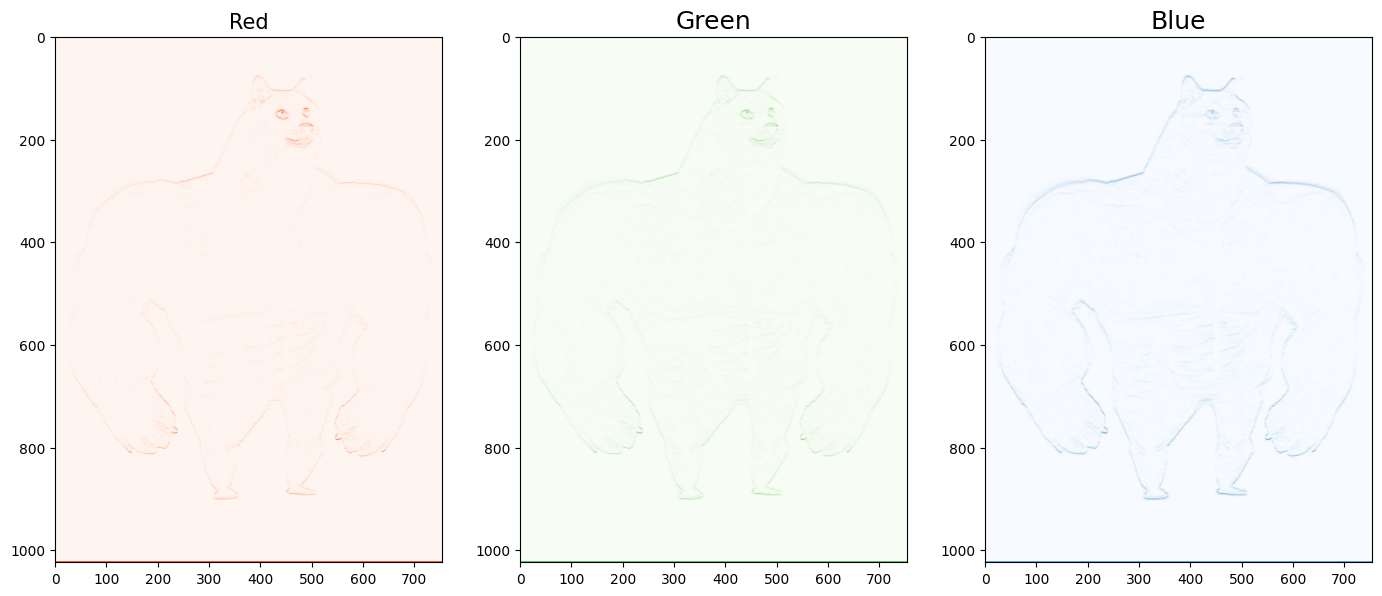

In [ ]:
#Can add different filters (defined above) here
convolved_rgb_gauss = convolver_rgb(dog, vertical.T ,1)

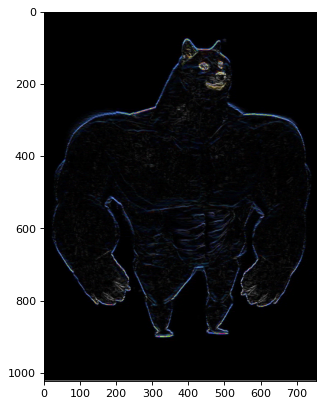

In [ ]:
plt.figure(num=None, figsize=(8,6), dpi=80)
plt.imshow(convolved_rgb_gauss,vmin=0,vmax=255);